<center>
<a href="http://uf-mi.u-bordeaux.fr/MSS/" ><img src="https://www.math.u-bordeaux.fr/~jbigot/Site/Enseignement_files/logo_MAS_MSS.jpg" style="float:left; max-width: 400px; display: inline" alt="INSA"/></a>

<a href="https://www.math.u-bordeaux.fr/" ><img src="https://www.math.u-bordeaux.fr/~jbigot/Site/Enseignement_files/LogoIMB.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 200px; display: inline" alt="Python"/></a> UE M2 Master MAS-MSS et CIMI ISI Projet Données Massives

# Classification d'images avec des réseaux de neurons profonds
<a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 150px; display: inline" alt="Python"/></a> &<a href="https://pytorch.org/">
    <img src="https://raw.githubusercontent.com/pytorch/pytorch/master/docs/source/_static/img/pytorch-logo-dark.png" style="width: 100px; height: 100px; transform: scale(0.1);" alt="PyTorch"/>
</a>








**Résumé**: Ce calepin propose l'utilisation des librairies `PyTorch`  pour l'implémentation de modèles de réseaux de neurones profond pour une tâche d'apprentissage supervisé à $K=2$ en traitement d'images.

Vous allez devoir implémenter ces algorithmes en grande dimension sur un problème de classification d'images couleurs de taille $128 \times 128$ (présence ou non d'une éolienne dans des images satellites) et comparer leurs performances.

Les données sont partagées en un ensemble d'apprentissage où pour chaque image vous connaissez sa classe (présence ou non d'une éolienne) et un ensemble de test (ensemble d'images non-labellisée) surlequel seront evaluées les performances de votre meilleure méthode à la fin du projet.

Vous pouvez télécharger les données liées à ce projet dans les liens suivants :

1) Petit jeu de données (Small) :

https://filesender.renater.fr/?s=download&token=b2e4ab1e-8df6-41f0-ae54-8bb33bf60c4a

2) Jeu de données complet :

https://filesender.renater.fr/?s=download&token=9aaf1fac-3265-41a1-9fcf-a6bfe586b14a



Les attendus du projet sont :

- un court compte-rendu qui présente le meilleur modèle que vous avez obtenu et sa validation à l'aide des données d'apprentissage,

- un fichier .csv qui contient les prédictions des classes pour les images de l'ensemble test à partir duquel un taux de bonne classification sera calculé en fin de projet.

Dans ce travail, vous pouvez créer vos propres architectures de réseaux de neurones, mais également utiliser des modèles pré-entraînés sur d'autres bases de données et les adapter à la problématique de classification d'images de ce projet. En PyTorch, vous pouvez utiliser des modèles pré-entraînés à partir de la bibliothèque torchvision.models, tels que ResNet, VGG, DenseNet, ou encore EfficientNet, et les ajuster (fine-tuning) à vos propres données. Un tutoriel sur l'apprentissage par transfert en PyTorch est disponible ici :

https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

## 1 Prise en main des données

On donne ci-dessous un exemple code qui permet de lire une image de la base d'apprentissage pour chaque classe.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


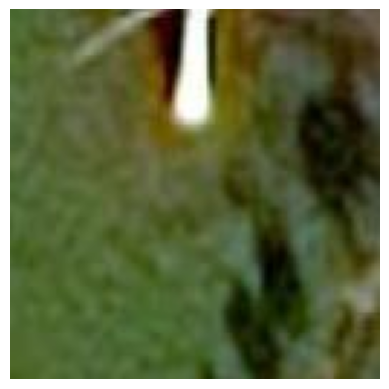

In [ ]:
# Visualisation des données avec PyTorch
from PIL import Image
import matplotlib.pyplot as plt

# Chemin d'accès aux données dans Google Drive

data_dir = '/content/drive/My Drive/UB Courses/Small'

img_path = data_dir + '/train/target/C254372785.jpg'

# Chargement de l'image avec PIL
img_path = data_dir + '/train/target/C254372785.jpg'
img = Image.open(img_path)

# Afficher l'image
plt.imshow(img)
plt.axis('off')  # Masquer les axes
plt.show()

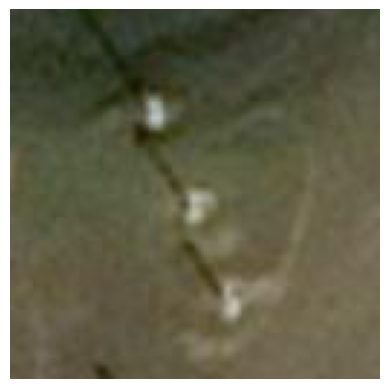

Taille de l'image (other):  torch.Size([3, 128, 128])


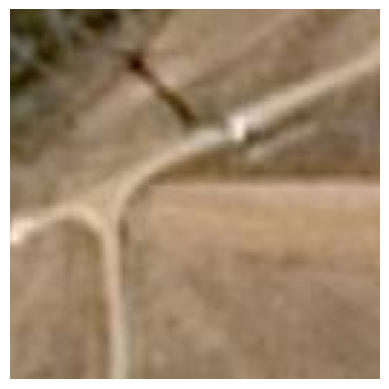

Taille de l'image (test):  torch.Size([3, 128, 128])
Premier canal de l'image (tensor): tensor([[0.2549, 0.2549, 0.2431,  ..., 0.2431, 0.2588, 0.2745],
        [0.2353, 0.2392, 0.2275,  ..., 0.2588, 0.2667, 0.2745],
        [0.2157, 0.2196, 0.2118,  ..., 0.2863, 0.2902, 0.2863],
        ...,
        [0.3608, 0.3647, 0.3686,  ..., 0.4588, 0.4627, 0.4667],
        [0.3804, 0.3804, 0.3765,  ..., 0.4510, 0.4549, 0.4588],
        [0.4039, 0.3961, 0.3843,  ..., 0.4392, 0.4431, 0.4431]])


In [2]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Définir la transformation ToTensor
to_tensor = transforms.ToTensor()

# Chemin d'accès aux données
# data_dir = '/content/drive/My Drive/UB Courses/Small'

# Visualiser une autre image
img_other_path = data_dir + '/train/target/C258215971.jpg'
img_other = Image.open(img_other_path)
img_other_tensor = to_tensor(img_other)

# Afficher l'autre image et sa taille
plt.imshow(img_other)
plt.axis('off')
plt.show()
print("Taille de l'image (other): ", img_other_tensor.shape)

# Charger une image du jeu de test
img_test_path = data_dir + '/test/test_subfolder/10.jpg'  # Correction du chemin
img_test = Image.open(img_test_path)
img_test_tensor = to_tensor(img_test)

# Afficher l'image test et sa taille
plt.imshow(img_test)
plt.axis('off')
plt.show()
print("Taille de l'image (test): ", img_test_tensor.shape)

# Affichage du premier canal de l'image "other" (le canal rouge dans RGB)
print("Premier canal de l'image (tensor):", img_other_tensor[0, :, :])


In [3]:
# Transformer l'image en tenseur PyTorch (déjà fait précédemment)
img_tensor = to_tensor(img)

# Afficher la taille de l'image sous forme de tenseur
print("Taille de l'image : ", img_tensor.shape)

# Afficher le deuxième canal (équivalent de x[:,:,1] en numpy)
print("Deuxième canal de l'image :", img_tensor[1, :, :])

Taille de l'image :  torch.Size([3, 128, 128])
Deuxième canal de l'image : tensor([[0.4039, 0.4039, 0.4078,  ..., 0.3412, 0.3490, 0.3490],
        [0.4078, 0.4039, 0.4039,  ..., 0.3569, 0.3608, 0.3608],
        [0.4118, 0.4078, 0.4039,  ..., 0.3647, 0.3608, 0.3569],
        ...,
        [0.3843, 0.3843, 0.3882,  ..., 0.3647, 0.3451, 0.3373],
        [0.3686, 0.3725, 0.3765,  ..., 0.3686, 0.3490, 0.3412],
        [0.3608, 0.3608, 0.3686,  ..., 0.3765, 0.3569, 0.3451]])


## 2 Méthode de base : régression logistique

On donne ci-dessous un exemple de code qui permet d'implémenter une méthode de  régression logistique, de calculer l'erreur de classification sur l'ensemble d'apprentissage, et donner la prédiction des classes sur l'ensemble test.

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

warnings.filterwarnings("ignore")

In [11]:
# Importation de librairies
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

### 2.1 Réseau de neurones à une seule couche

On rappelle que la formulation du modèle de régression logistique peut s'interpréter comme la construction d'un réseau de neurones à une seule couche (les entrées) avec deux neurones de sortie, et l'utilisation de la sigmoïde comme fonction d'activation ainsi que de la cross-entropy comme terme d'attache aux données. Les paramètres d'un tel réseau de neurones peuvent être estimés à l'aide de l'algorithme de descente de gradient stochastique ``ADAM`` qui est implémenté dans la librairie `PyTorch`, et dont un exemple d'utilisation est présenté dans le code ci-dessous. Ce code est également une illustration de l'utilisation des réseaux de neurones pour la classification d'images à partir de leur lecture dans un dossier sans importer l'ensemble de la base d'apprentissage.

In [100]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Paramètres
nb_classes = 2
batch_size = 100
img_width = 128
img_height = 128

# Chemin d'accès aux données
# data_dir = '/content/drive/My Drive/UB Courses/Small'

# Définir les transformations pour normaliser les images
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((img_width, img_height)),  # Redimensionner les images
        transforms.ToTensor(),  # Convertir les images en tenseur PyTorch
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normaliser les images
    ]),
    'val': transforms.Compose([
        transforms.Resize((img_width, img_height)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Charger les ensembles d'entraînement et de validation
train_dataset = datasets.ImageFolder(data_dir + '/train', transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(data_dir + '/validation', transform=data_transforms['val'])

# Créer les DataLoaders pour charger les images par lots
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Obtenir les classes
class_names = train_dataset.classes
print(f"Classes: {class_names}")

Classes: ['other', 'target']


## 3 Entrainement et Validation des modèles (Données Small)

**``Démarche méthodologique``**:

La première étape de notre démarche a consisté à tester un large éventail de modèles afin d’évaluer leur capacité à résoudre le problème de classification d’images en deux classes (présence ou absence d’éoliennes). Cette approche exploratoire visait à identifier les modèles ayant le meilleur potentiel en termes de précision et de robustesse. Les modèles testés incluaient à la fois des architectures développées de manière personnalisée et des modèles pré-entrainés reconnus pour leur efficacité dans des tâches similaires de classification binaire.

Les modèles personnalisés ont été conçus en s'inspirant d'architectures réputées dans la littérature, telles que les structures de type CNN (Res_net, VGG) . L’objectif était de capturer des caractéristiques complexes tout en maintenant un compromis entre la précision et le temps de calcul. Parallèlement, nous avons intégré des modèles pré-entrainés comme MobileNetV2, DenseNet, efficientNet, qui offrent l’avantage d’être optimisés pour des tâches génériques et adaptés au fine-tuning. Ces modèles pré-entrainés ont été choisis pour leur efficacité à capturer des motifs complexes tout en étant adaptables à de nouvelles données.

La phase de sélection s’est basée sur des critères précis, tels que la perte de validation, la précision ainsi que le temps d'exécution des modèles. L’évaluation s'est faite sur la base de données ``Small`` et a permis de distinguer les modèles qui présentaient une performance élevée et une bonne capacité de généralisation. Les modèles sélectionnés lors de cette première phase ont ensuite été préparés pour la prédiction finale sur la base de données ``Data_Projet_1_Defi_IA``, présentée en section 4.

In [ ]:
class train_valid_model:

    def __init__(self, model, train_loader, val_loader, optimizer, criterion, scheduler=None, device=None):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.optimizer = optimizer
        self.criterion = criterion
        self.scheduler = scheduler
        self.device = device if device else torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)
        self.criterion.to(self.device)

    def train_and_valid(self, epochs, model_name, tolerance=0.05):
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []
        best_val_loss = float('inf')
        start_time = time.time()

        for epoch in range(epochs):

            # Entraînement
            self.model.train()
            running_loss = 0.0
            correct = 0
            total = 0

            for images, labels in tqdm(self.train_loader, desc=f"Epoch {epoch+1}/{epochs} ({model_name})"):
                images, labels = images.to(self.device), labels.to(self.device)
                self.optimizer.zero_grad()
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()

                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

            epoch_loss = running_loss / len(self.train_loader)
            epoch_acc = correct / total
            train_losses.append(epoch_loss)
            train_accuracies.append(100 * epoch_acc)
            print(f"Epoch {epoch+1}, Loss ({model_name}): {epoch_loss:.4f}, Accuracy: {100 * epoch_acc:.2f}%")

            # Validation
            self.model.eval()
            val_loss = 0.0
            val_correct = 0
            val_total = 0

            with torch.no_grad():
                for images, labels in self.val_loader:
                    images, labels = images.to(self.device), labels.to(self.device)
                    outputs = self.model(images)
                    loss = self.criterion(outputs, labels)
                    val_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    val_correct += (predicted == labels).sum().item()
                    val_total += labels.size(0)

            val_epoch_loss = val_loss / len(self.val_loader)
            val_epoch_acc = val_correct / val_total
            val_losses.append(val_epoch_loss)
            val_accuracies.append(100 * val_epoch_acc)
            print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {100 * val_epoch_acc:.2f}%")

            # Scheduler step
            if self.scheduler:
                self.scheduler.step(val_epoch_loss)

            if epoch > 10 and val_loss > best_val_loss * (1 - tolerance):
                print("Arrêt précoce activé.")
                break
            best_val_loss = val_loss

        epoch_time = time.time() - start_time
        print(f"Temps d'exécution jusqu'à l'époque {epoch+1}: {epoch_time:.2f} secondes")
            
        return train_losses, val_losses, train_accuracies, val_accuracies
    
    def plots(self, train_losses, val_losses, train_accuracies, val_accuracies, model_name):
        fig, axes = plt.subplots(1, 2, figsize=(16, 5))
        fig.suptitle(f"Évolution du Risque Empirique (Loss) et de l'Accuracy du {model_name}", fontsize=16)
        
        # Accuracy
        axes[0].plot(train_accuracies, label='Training Accuracy')
        axes[0].plot(val_accuracies, label='Validation Accuracy')
        axes[0].legend(loc='lower right')
        axes[0].set_ylabel('Accuracy')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylim([0, 100])
        axes[0].set_title('Training and Validation Accuracy')
        
        # Loss
        axes[1].plot(train_losses, label='Training Loss')
        axes[1].plot(val_losses, label='Validation Loss')
        axes[1].legend(loc='upper right')
        axes[1].set_ylabel('Loss')
        axes[1].set_xlabel('Epoch')
        axes[1].set_title('Training and Validation Loss')
        
        plt.tight_layout()
        plt.show()

### 3.1 Modèle Basique

In [68]:
# Définition d'un réseau de neurones basique en PyTorch sans Softmax
class BasicModel(nn.Module):
    def __init__(self):
        super(BasicModel, self).__init__()

        # Couche Flatten
        self.flatten = nn.Flatten()  # Transforme les dimensions (batch_size, canaux, hauteur, largeur) en (batch_size, features)
        
        # Couche Dense avec 2 neurones de sortie (classification binaire)
        self.fc = nn.Linear(img_width * img_height * 3, 2)  # Deux sorties pour les logits

    def forward(self, x):
        x = self.flatten(x) 
        x = self.fc(x) # Sortie directe des logits
        return x

In [69]:
# Paramètres entrainement_validation
model = BasicModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)
criterion = nn.CrossEntropyLoss()

trainer = train_valid_model(model=model, train_loader=train_loader, val_loader=val_loader, optimizer=optimizer, 
    criterion=criterion, scheduler=scheduler)

# Appeler la fonction d'entraînement et de validation
train_losses, val_losses, train_accuracies, val_accuracies = trainer.train_and_valid(epochs=20, model_name="BasicModel")

Epoch 1/20 (BasicModel): 100%|██████████| 4/4 [00:00<00:00, 11.36it/s]


Epoch 1, Loss (BasicModel): 7.5884, Accuracy: 56.15%
Validation Loss: 8.3247, Validation Accuracy: 45.00%


Epoch 2/20 (BasicModel): 100%|██████████| 4/4 [00:00<00:00, 11.88it/s]


Epoch 2, Loss (BasicModel): 3.0723, Accuracy: 59.62%
Validation Loss: 9.5999, Validation Accuracy: 44.00%


Epoch 3/20 (BasicModel): 100%|██████████| 4/4 [00:00<00:00, 11.64it/s]


Epoch 3, Loss (BasicModel): 4.6112, Accuracy: 55.84%
Validation Loss: 7.2758, Validation Accuracy: 58.00%


Epoch 4/20 (BasicModel): 100%|██████████| 4/4 [00:00<00:00, 11.61it/s]


Epoch 4, Loss (BasicModel): 3.6070, Accuracy: 62.46%
Validation Loss: 9.1525, Validation Accuracy: 44.00%


Epoch 5/20 (BasicModel): 100%|██████████| 4/4 [00:00<00:00, 13.13it/s]


Epoch 5, Loss (BasicModel): 2.8064, Accuracy: 68.14%
Validation Loss: 5.3554, Validation Accuracy: 61.00%


Epoch 6/20 (BasicModel): 100%|██████████| 4/4 [00:00<00:00, 13.26it/s]


Epoch 6, Loss (BasicModel): 2.0617, Accuracy: 70.03%
Validation Loss: 5.9651, Validation Accuracy: 45.00%


Epoch 7/20 (BasicModel): 100%|██████████| 4/4 [00:00<00:00,  9.73it/s]


Epoch 7, Loss (BasicModel): 1.8597, Accuracy: 73.19%
Validation Loss: 3.7885, Validation Accuracy: 64.00%


Epoch 8/20 (BasicModel): 100%|██████████| 4/4 [00:00<00:00, 11.16it/s]


Epoch 8, Loss (BasicModel): 1.4879, Accuracy: 74.13%
Validation Loss: 3.1544, Validation Accuracy: 51.00%


Epoch 9/20 (BasicModel): 100%|██████████| 4/4 [00:00<00:00, 11.29it/s]


Epoch 9, Loss (BasicModel): 0.8972, Accuracy: 79.81%
Validation Loss: 1.8325, Validation Accuracy: 73.00%


Epoch 10/20 (BasicModel): 100%|██████████| 4/4 [00:00<00:00, 11.97it/s]


Epoch 10, Loss (BasicModel): 0.7884, Accuracy: 82.33%
Validation Loss: 1.6650, Validation Accuracy: 71.00%


Epoch 11/20 (BasicModel): 100%|██████████| 4/4 [00:00<00:00, 12.50it/s]


Epoch 11, Loss (BasicModel): 0.5496, Accuracy: 83.28%
Validation Loss: 1.4962, Validation Accuracy: 73.00%


Epoch 12/20 (BasicModel): 100%|██████████| 4/4 [00:00<00:00, 11.44it/s]

Epoch 12, Loss (BasicModel): 0.3450, Accuracy: 90.54%
Validation Loss: 1.4528, Validation Accuracy: 72.00%
Arrêt précoce activé.
Temps d'exécution jusqu'à l'époque 12: 5.34 secondes


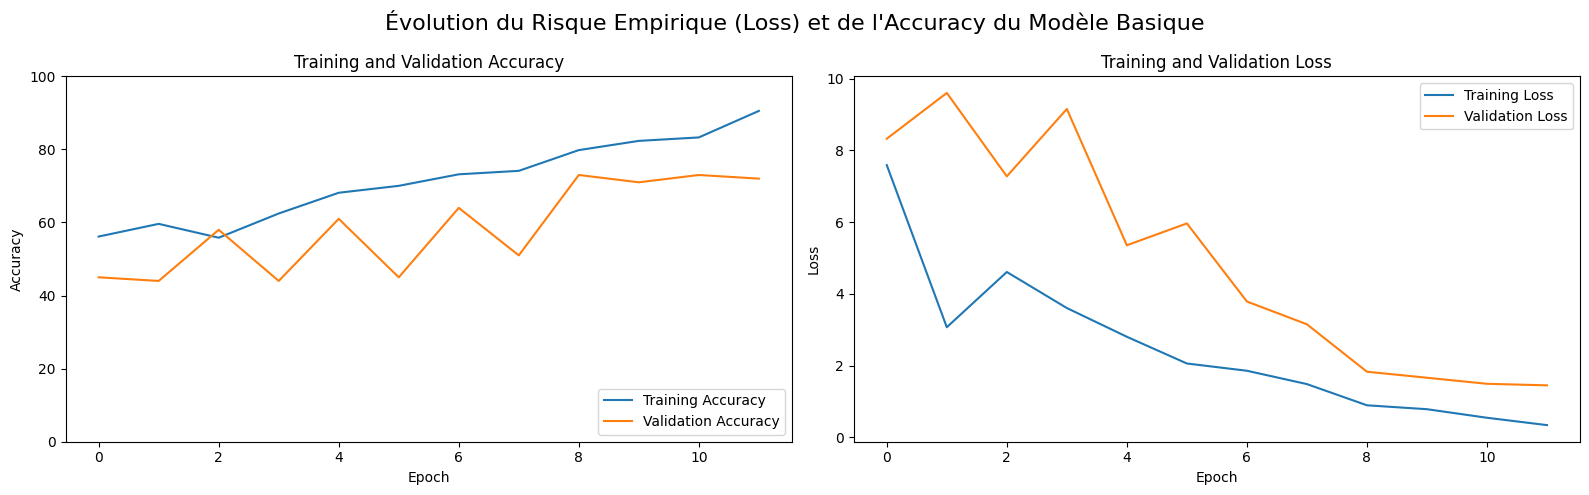

In [70]:
# Graphes Training and Validation (Accuracy and Loss)
trainer.plots(train_losses, val_losses, train_accuracies, val_accuracies, model_name="Modèle Basique")

Le modèle montre une amélioration significative avec une précision d'entraînement passant de 56.15% à 90.54% en 12 époques, mais la perte de validation reste instable, atteignant 1.45 à la fin. La précision de validation atteint 73% avant de stagner, ce qui est mieux que le hasard. L'arrêt précoce a été activé pour éviter un sur-apprentissage. Temps d'exécution total : environ 6 secondes.

### 3.2 Réseaux de neurones convolutifs 1 (Inspiré de l'architecture du ResNet)

In [ ]:
a, b = 1, 0 # or 3, 1 best results

# Définition d'un réseau de neurones basique pour la classification binaire
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=a, padding=b)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=a, padding=b)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=a, padding=b)
        self.bn3 = nn.BatchNorm2d(64)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=a, padding=b)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=a, padding=b)
        self.bn5 = nn.BatchNorm2d(256)
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv6 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=a, padding=b)
        self.bn6 = nn.BatchNorm2d(512)
        self.pool6 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv7 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=a, padding=b)
        self.bn7 = nn.BatchNorm2d(1024)
        self.pool7 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Couche Flatten
        self.flatten = nn.Flatten() 

        # Couches denses (fully connected)
        self.fc = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 2)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.pool1(self.relu(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu(self.bn3(self.conv3(x))))
        x = self.pool4(self.relu(self.bn4(self.conv4(x))))
        x = self.pool5(self.relu(self.bn5(self.conv5(x))))
        x = self.pool6(self.relu(self.bn6(self.conv6(x))))
        x = self.pool7(self.relu(self.bn7(self.conv7(x))))
        x = self.flatten(x)
        x = self.relu(self.fc(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x  # Sortie des logits sans Softmax

In [73]:
# Paramètres entrainement_validation
model = CNN()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)
criterion = nn.CrossEntropyLoss()

trainer_cnn = train_valid_model(model=model, train_loader=train_loader, val_loader=val_loader, optimizer=optimizer, 
    criterion=criterion, scheduler=scheduler)

# Appeler la fonction d'entraînement et de validation
train_losses, val_losses, train_accuracies, val_accuracies = trainer_cnn.train_and_valid(epochs=20, model_name="CNN")

Epoch 1/20 (CNN): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


Epoch 1, Loss (CNN): 7.5301, Accuracy: 48.58%
Validation Loss: 0.4165, Validation Accuracy: 95.00%


Epoch 2/20 (CNN): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


Epoch 2, Loss (CNN): 0.5988, Accuracy: 66.25%
Validation Loss: 0.2454, Validation Accuracy: 95.00%


Epoch 3/20 (CNN): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Epoch 3, Loss (CNN): 0.2135, Accuracy: 93.38%
Validation Loss: 0.1675, Validation Accuracy: 95.00%


Epoch 4/20 (CNN): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


Epoch 4, Loss (CNN): 0.2411, Accuracy: 91.17%
Validation Loss: 0.6549, Validation Accuracy: 93.00%


Epoch 5/20 (CNN): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


Epoch 5, Loss (CNN): 0.1802, Accuracy: 94.32%
Validation Loss: 0.2588, Validation Accuracy: 96.00%


Epoch 6/20 (CNN): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Epoch 6, Loss (CNN): 0.1846, Accuracy: 93.38%
Validation Loss: 0.1769, Validation Accuracy: 96.00%


Epoch 7/20 (CNN): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Epoch 7, Loss (CNN): 0.1445, Accuracy: 95.90%
Validation Loss: 0.4064, Validation Accuracy: 92.00%


Epoch 8/20 (CNN): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Epoch 8, Loss (CNN): 0.1232, Accuracy: 94.64%
Validation Loss: 0.2872, Validation Accuracy: 94.00%


Epoch 9/20 (CNN): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]


Epoch 9, Loss (CNN): 0.1146, Accuracy: 95.90%
Validation Loss: 0.2246, Validation Accuracy: 96.00%


Epoch 10/20 (CNN): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


Epoch 10, Loss (CNN): 0.1272, Accuracy: 95.90%
Validation Loss: 0.1828, Validation Accuracy: 96.00%


Epoch 11/20 (CNN): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


Epoch 11, Loss (CNN): 0.1684, Accuracy: 96.21%
Validation Loss: 0.1556, Validation Accuracy: 97.00%


Epoch 12/20 (CNN): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


Epoch 12, Loss (CNN): 0.1849, Accuracy: 96.21%
Validation Loss: 0.1439, Validation Accuracy: 97.00%


Epoch 13/20 (CNN): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


Epoch 13, Loss (CNN): 0.2082, Accuracy: 95.27%
Validation Loss: 0.1426, Validation Accuracy: 97.00%
Arrêt précoce activé.
Temps d'exécution jusqu'à l'époque 13: 41.10 secondes


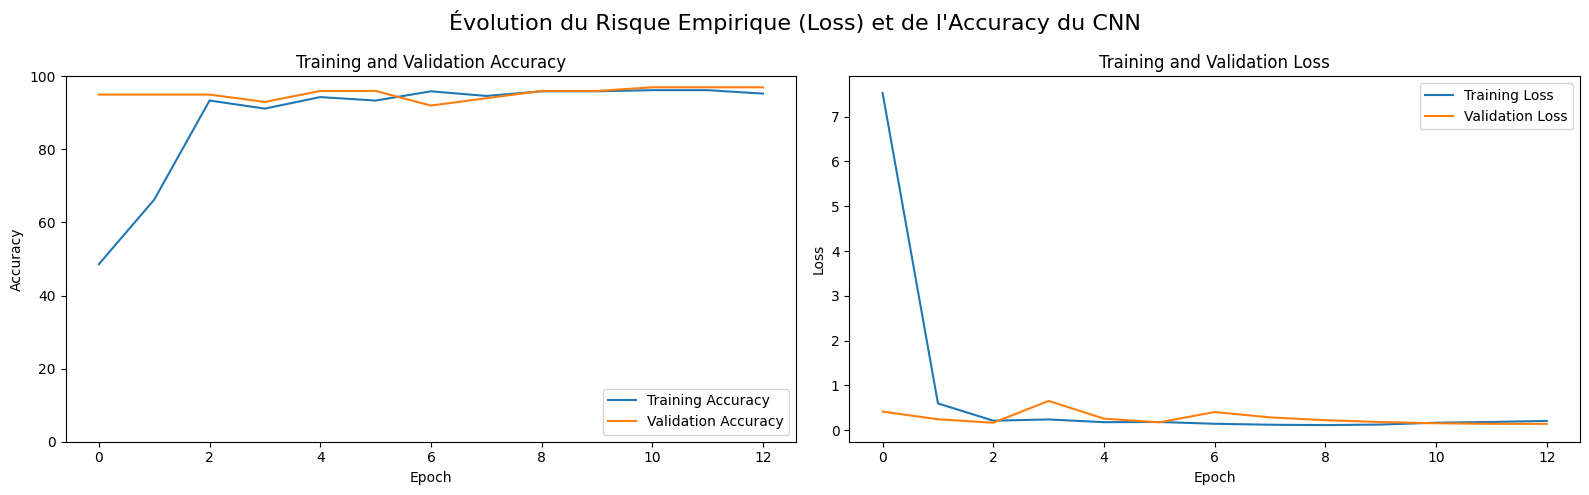

In [74]:
# Graphes Training and Validation (Accuracy and Loss)
trainer_cnn.plots(train_losses, val_losses, train_accuracies, val_accuracies, model_name="CNN")

L'entraînement du premier modèle CNN montre une progression notable de la précision d'entraînement, passant de 48.58% à 95.27% en 13 époques, indiquant un apprentissage efficace du modèle. La perte de validation diminue régulièrement, passant de 0.4165 à 0.1426, avec une précision de validation atteignant 97%, ce qui témoigne de la capacité du modèle à généraliser sur les données de validation. Toutefois, des signes de surapprentissage pourraient apparaître si l'entraînement se poursuivait, justifiant l'activation de l'arrêt précoce à l'époque 13. L'ensemble du processus a pris 41.10 secondes, indiquant une exécution relativement rapide pour un modèle de cette taille et complexité. Toutefois, une instabilité des résultats est notable, probablement due à la taille limitée de la base de données Small.

### 3.3 Réseaux de neurones convolutifs 2 (Inspiré de l'architecture du VGG) 

In [ ]:
a, b = 1, 0

# Définition d'un réseau de neurones basique pour la classification binaire
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        #
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=a, padding=b)
        self.bn1 = nn.BatchNorm2d(16)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=a, padding=b)
        self.bn2 = nn.BatchNorm2d(32)
        
        self.pool1 = nn.MaxPool2d(kernel_size=4, stride=4)
    
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=a, padding=b)
        self.bn3 = nn.BatchNorm2d(64)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=a, padding=b)
        self.bn4 = nn.BatchNorm2d(128)
        
        self.pool2 = nn.MaxPool2d(kernel_size=4, stride=4)

        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=a, padding=b)
        self.bn5 = nn.BatchNorm2d(256)

        self.conv6 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=a, padding=b)
        self.bn6 = nn.BatchNorm2d(512)
        
        self.pool3 = nn.MaxPool2d(kernel_size=4, stride=4)

        self.conv7 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=a, padding=b)
        self.bn7 = nn.BatchNorm2d(1024)

        self.conv8 = nn.Conv2d(in_channels=1024, out_channels=2048, kernel_size=a, padding=b)
        self.bn8 = nn.BatchNorm2d(2048)
        
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Couche Flatten
        self.flatten = nn.Flatten()
        
        # Couche dense (fully connected)
        self.fc = nn.Linear(2048, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 2)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.pool1(self.relu(self.bn2(self.conv2(self.relu(self.bn1(self.conv1(x)))))))
        x = self.pool2(self.relu(self.bn4(self.conv4(self.relu(self.bn3(self.conv3(x)))))))
        x = self.pool3(self.relu(self.bn6(self.conv6(self.relu(self.bn5(self.conv5(x)))))))
        x = self.pool4(self.relu(self.bn8(self.conv8(self.relu(self.bn7(self.conv7(x)))))))
        x = self.flatten(x)
        x = self.relu(self.fc(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [79]:
# Paramètres entrainement_validation
model = CNN2()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)
criterion = nn.CrossEntropyLoss()

trainer_cnn2 = train_valid_model(model=model, train_loader=train_loader, val_loader=val_loader, optimizer=optimizer, 
    criterion=criterion, scheduler=scheduler)

# Appeler la fonction d'entraînement et de validation
train_losses, val_losses, train_accuracies, val_accuracies = trainer_cnn2.train_and_valid(epochs=20, model_name="CNN2")

Epoch 1/20 (CNN2): 100%|██████████| 4/4 [00:07<00:00,  1.85s/it]


Epoch 1, Loss (CNN2): 12.4764, Accuracy: 50.79%
Validation Loss: 2.0944, Validation Accuracy: 50.00%


Epoch 2/20 (CNN2): 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]


Epoch 2, Loss (CNN2): 0.9289, Accuracy: 54.89%
Validation Loss: 0.6373, Validation Accuracy: 51.00%


Epoch 3/20 (CNN2): 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]


Epoch 3, Loss (CNN2): 0.3891, Accuracy: 86.75%
Validation Loss: 1.3859, Validation Accuracy: 50.00%


Epoch 4/20 (CNN2): 100%|██████████| 4/4 [00:07<00:00,  1.94s/it]


Epoch 4, Loss (CNN2): 0.7579, Accuracy: 93.06%
Validation Loss: 0.5596, Validation Accuracy: 96.00%


Epoch 5/20 (CNN2): 100%|██████████| 4/4 [00:07<00:00,  1.95s/it]


Epoch 5, Loss (CNN2): 0.2622, Accuracy: 92.74%
Validation Loss: 0.1863, Validation Accuracy: 96.00%


Epoch 6/20 (CNN2): 100%|██████████| 4/4 [00:07<00:00,  1.92s/it]


Epoch 6, Loss (CNN2): 0.2277, Accuracy: 91.80%
Validation Loss: 0.1720, Validation Accuracy: 96.00%


Epoch 7/20 (CNN2): 100%|██████████| 4/4 [00:07<00:00,  1.96s/it]


Epoch 7, Loss (CNN2): 0.2399, Accuracy: 94.95%
Validation Loss: 0.1507, Validation Accuracy: 96.00%


Epoch 8/20 (CNN2): 100%|██████████| 4/4 [00:07<00:00,  1.99s/it]


Epoch 8, Loss (CNN2): 0.2069, Accuracy: 92.74%
Validation Loss: 0.1479, Validation Accuracy: 96.00%


Epoch 9/20 (CNN2): 100%|██████████| 4/4 [00:07<00:00,  2.00s/it]


Epoch 9, Loss (CNN2): 0.1520, Accuracy: 92.74%
Validation Loss: 0.1320, Validation Accuracy: 96.00%


Epoch 10/20 (CNN2): 100%|██████████| 4/4 [00:07<00:00,  1.99s/it]


Epoch 10, Loss (CNN2): 0.1749, Accuracy: 94.32%
Validation Loss: 0.1299, Validation Accuracy: 96.00%


Epoch 11/20 (CNN2): 100%|██████████| 4/4 [00:08<00:00,  2.01s/it]


Epoch 11, Loss (CNN2): 0.1455, Accuracy: 94.64%
Validation Loss: 0.1400, Validation Accuracy: 96.00%


Epoch 12/20 (CNN2): 100%|██████████| 4/4 [00:08<00:00,  2.07s/it]


Epoch 12, Loss (CNN2): 0.1697, Accuracy: 93.06%
Validation Loss: 0.1389, Validation Accuracy: 96.00%
Arrêt précoce activé.
Temps d'exécution jusqu'à l'époque 12: 103.41 secondes


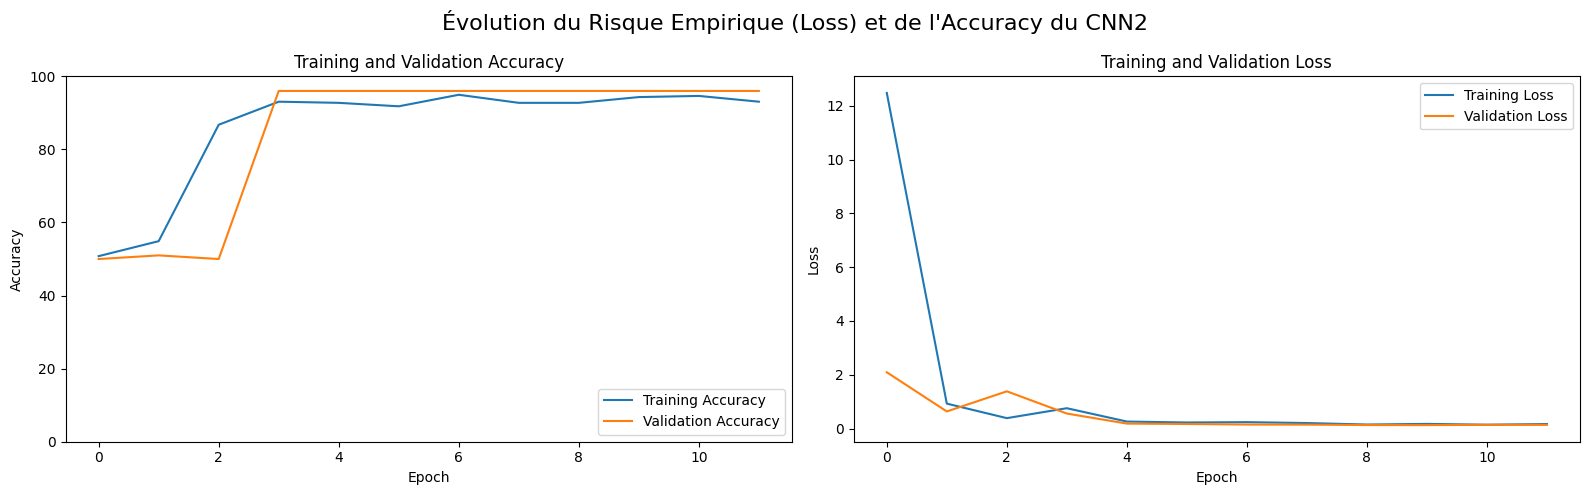

In [80]:
# Graphes Training and Validation (Accuracy and Loss)
trainer_cnn2.plots(train_losses, val_losses, train_accuracies, val_accuracies, model_name="CNN2")

Le modèle CNN2 commence avec une précision d'entraînement modeste de 50.79% à l'époque 1 et progresse de manière significative jusqu'à 93.06% à l'époque 12, indiquant une amélioration constante de l'apprentissage. La perte de validation, initialement élevée à 2.0944, diminue rapidement, et se stabilise autour de 0.1299 à l'époque 10, tout en maintenant une précision de validation constante de 96% dès l'époque 4. Cela montre que le modèle a acquis une bonne capacité de généralisation. L'arrêt précoce à l'époque 12 était justifié pour éviter un surapprentissage, suggérant que le modèle avait atteint un plateau. Le temps total d'exécution jusqu'à l'arrêt précoce était de 103.41 secondes, ce qui reste raisonnable mais plus lent comparé aux deux premiers modèles.

### 3.4 Modèle Pré-entraîné (MobileNet_V2)

In [5]:
from torchvision import models

# Charger le modèle pré-entraîné
class MobileNet_V2(nn.Module):
    def __init__(self):
        super(MobileNet_V2, self).__init__()
        self.base_model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)
        self.base_model.classifier = nn.Sequential(nn.Dropout(0.2),nn.Linear(self.base_model.last_channel, 2))

    def forward(self, x):
        return self.base_model(x)

In [83]:
# Paramètres entrainement_validation
model = MobileNet_V2()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)
criterion = nn.CrossEntropyLoss()

trainer_mn = train_valid_model(model=model, train_loader=train_loader, val_loader=val_loader, optimizer=optimizer, 
    criterion=criterion, scheduler=scheduler)

# Appeler la fonction d'entraînement et de validation
train_losses, val_losses, train_accuracies, val_accuracies = trainer_mn.train_and_valid(epochs=20, model_name="MobileNetv2")

Epoch 1/20 (MobileNetv2): 100%|██████████| 4/4 [00:16<00:00,  4.15s/it]


Epoch 1, Loss (MobileNetv2): 0.3141, Accuracy: 80.13%
Validation Loss: 0.2207, Validation Accuracy: 94.00%


Epoch 2/20 (MobileNetv2): 100%|██████████| 4/4 [00:14<00:00,  3.74s/it]


Epoch 2, Loss (MobileNetv2): 0.2304, Accuracy: 93.38%
Validation Loss: 0.5193, Validation Accuracy: 98.00%


Epoch 3/20 (MobileNetv2): 100%|██████████| 4/4 [00:13<00:00,  3.34s/it]


Epoch 3, Loss (MobileNetv2): 0.1053, Accuracy: 95.90%
Validation Loss: 0.4265, Validation Accuracy: 98.00%


Epoch 4/20 (MobileNetv2): 100%|██████████| 4/4 [00:13<00:00,  3.29s/it]


Epoch 4, Loss (MobileNetv2): 0.0072, Accuracy: 100.00%
Validation Loss: 0.3329, Validation Accuracy: 97.00%


Epoch 5/20 (MobileNetv2): 100%|██████████| 4/4 [00:13<00:00,  3.43s/it]


Epoch 5, Loss (MobileNetv2): 0.0173, Accuracy: 99.68%
Validation Loss: 0.2555, Validation Accuracy: 97.00%


Epoch 6/20 (MobileNetv2): 100%|██████████| 4/4 [00:15<00:00,  3.85s/it]


Epoch 6, Loss (MobileNetv2): 0.0113, Accuracy: 100.00%
Validation Loss: 0.2115, Validation Accuracy: 97.00%


Epoch 7/20 (MobileNetv2): 100%|██████████| 4/4 [00:13<00:00,  3.39s/it]


Epoch 7, Loss (MobileNetv2): 0.0074, Accuracy: 100.00%
Validation Loss: 0.1890, Validation Accuracy: 97.00%


Epoch 8/20 (MobileNetv2): 100%|██████████| 4/4 [00:13<00:00,  3.43s/it]


Epoch 8, Loss (MobileNetv2): 0.0055, Accuracy: 100.00%
Validation Loss: 0.1716, Validation Accuracy: 97.00%


Epoch 9/20 (MobileNetv2): 100%|██████████| 4/4 [00:13<00:00,  3.29s/it]


Epoch 9, Loss (MobileNetv2): 0.0035, Accuracy: 100.00%
Validation Loss: 0.1643, Validation Accuracy: 97.00%


Epoch 10/20 (MobileNetv2): 100%|██████████| 4/4 [00:11<00:00,  2.96s/it]


Epoch 10, Loss (MobileNetv2): 0.0034, Accuracy: 100.00%
Validation Loss: 0.1566, Validation Accuracy: 97.00%


Epoch 11/20 (MobileNetv2): 100%|██████████| 4/4 [00:14<00:00,  3.54s/it]


Epoch 11, Loss (MobileNetv2): 0.0018, Accuracy: 100.00%
Validation Loss: 0.1534, Validation Accuracy: 97.00%


Epoch 12/20 (MobileNetv2): 100%|██████████| 4/4 [00:14<00:00,  3.60s/it]


Epoch 12, Loss (MobileNetv2): 0.0013, Accuracy: 100.00%
Validation Loss: 0.1472, Validation Accuracy: 97.00%
Arrêt précoce activé.
Temps d'exécution jusqu'à l'époque 12: 182.50 secondes


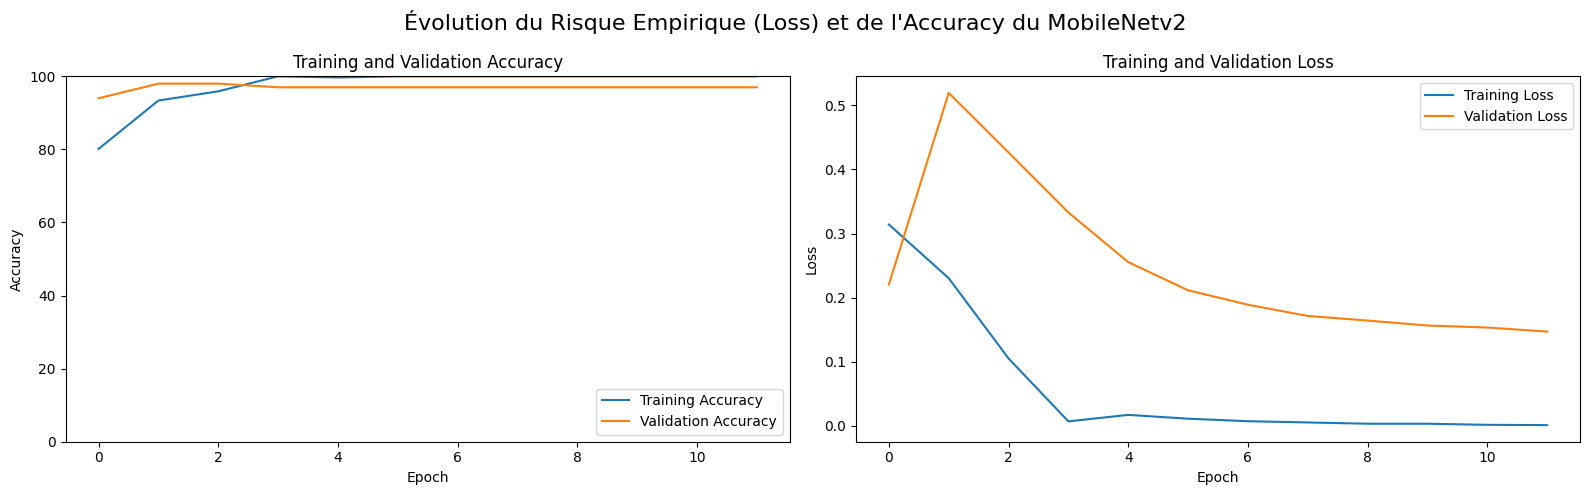

In [85]:
# Graphes Training and Validation (Accuracy and Loss)
trainer_mn.plots(train_losses, val_losses, train_accuracies, val_accuracies, model_name="MobileNetv2")

Le modèle MobileNetV2 pré-entraîné a démontré une impressionnante performance d'apprentissage atteignant très vite les plus hautes précisions. La perte de validation quant à elle a diminué progressivement de 0.2207 à 0.1472, tandis que la précision de validation s'est maintenue à un excellent niveau de 97% à partir de l'époque 2, témoignant de la stabilité et de la capacité du modèle à bien généraliser. L'arrêt précoce a été activé à l'époque 12 pour prévenir un éventuel surapprentissage, avec un temps total d'exécution de 182.50 secondes, reflétant la complexité du modèle. Ces résultats montrent l'efficacité du MobileNetV2 à classifier les images.

### 3.5 Modèle Pré-entraîné (DenseNet)

In [86]:
from torchvision.models import densenet121

class DenseNetModel(nn.Module):
    def __init__(self):
        super(DenseNetModel, self).__init__()
        self.base_model = densenet121(pretrained=True)
        num_features = self.base_model.classifier.in_features
        self.base_model.classifier = nn.Linear(num_features, 2)

    def forward(self, x):
        return self.base_model(x)

In [88]:
# Paramètres entrainement_validation
model = DenseNetModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)
criterion = nn.CrossEntropyLoss()

trainer_dense = train_valid_model(model=model, train_loader=train_loader, val_loader=val_loader, optimizer=optimizer, 
    criterion=criterion, scheduler=scheduler)

# Appeler la fonction d'entraînement et de validation
train_losses, val_losses, train_accuracies, val_accuracies = trainer_dense.train_and_valid(epochs=20, model_name="DenseNetModel")

Epoch 1/20 (DenseNetModel): 100%|██████████| 4/4 [00:33<00:00,  8.46s/it]


Epoch 1, Loss (DenseNetModel): 0.3945, Accuracy: 70.66%
Validation Loss: 2.4252, Validation Accuracy: 56.00%


Epoch 2/20 (DenseNetModel): 100%|██████████| 4/4 [00:49<00:00, 12.36s/it]


Epoch 2, Loss (DenseNetModel): 0.0527, Accuracy: 97.16%
Validation Loss: 1.9969, Validation Accuracy: 71.00%


Epoch 3/20 (DenseNetModel): 100%|██████████| 4/4 [00:41<00:00, 10.29s/it]


Epoch 3, Loss (DenseNetModel): 0.0585, Accuracy: 97.79%
Validation Loss: 2.5357, Validation Accuracy: 72.00%


Epoch 4/20 (DenseNetModel): 100%|██████████| 4/4 [00:37<00:00,  9.34s/it]


Epoch 4, Loss (DenseNetModel): 0.0251, Accuracy: 99.05%
Validation Loss: 1.9160, Validation Accuracy: 74.00%


Epoch 5/20 (DenseNetModel): 100%|██████████| 4/4 [00:38<00:00,  9.58s/it]


Epoch 5, Loss (DenseNetModel): 0.0046, Accuracy: 99.68%
Validation Loss: 1.1742, Validation Accuracy: 80.00%


Epoch 6/20 (DenseNetModel): 100%|██████████| 4/4 [00:36<00:00,  9.19s/it]


Epoch 6, Loss (DenseNetModel): 0.0236, Accuracy: 99.37%
Validation Loss: 1.0480, Validation Accuracy: 87.00%


Epoch 7/20 (DenseNetModel): 100%|██████████| 4/4 [00:37<00:00,  9.30s/it]


Epoch 7, Loss (DenseNetModel): 0.0865, Accuracy: 98.74%
Validation Loss: 1.3059, Validation Accuracy: 88.00%


Epoch 8/20 (DenseNetModel): 100%|██████████| 4/4 [00:37<00:00,  9.37s/it]


Epoch 8, Loss (DenseNetModel): 0.0182, Accuracy: 99.37%
Validation Loss: 2.2137, Validation Accuracy: 81.00%


Epoch 9/20 (DenseNetModel): 100%|██████████| 4/4 [00:38<00:00,  9.66s/it]


Epoch 9, Loss (DenseNetModel): 0.3915, Accuracy: 98.74%
Validation Loss: 2.0028, Validation Accuracy: 78.00%


Epoch 10/20 (DenseNetModel): 100%|██████████| 4/4 [00:36<00:00,  9.02s/it]


Epoch 10, Loss (DenseNetModel): 0.0269, Accuracy: 99.05%
Validation Loss: 0.5081, Validation Accuracy: 93.00%


Epoch 11/20 (DenseNetModel): 100%|██████████| 4/4 [00:35<00:00,  9.00s/it]


Epoch 11, Loss (DenseNetModel): 0.0284, Accuracy: 97.79%
Validation Loss: 0.3142, Validation Accuracy: 94.00%


Epoch 12/20 (DenseNetModel): 100%|██████████| 4/4 [00:38<00:00,  9.59s/it]


Epoch 12, Loss (DenseNetModel): 0.0107, Accuracy: 99.68%
Validation Loss: 0.2993, Validation Accuracy: 93.00%
Arrêt précoce activé.
Temps d'exécution jusqu'à l'époque 12: 502.63 secondes


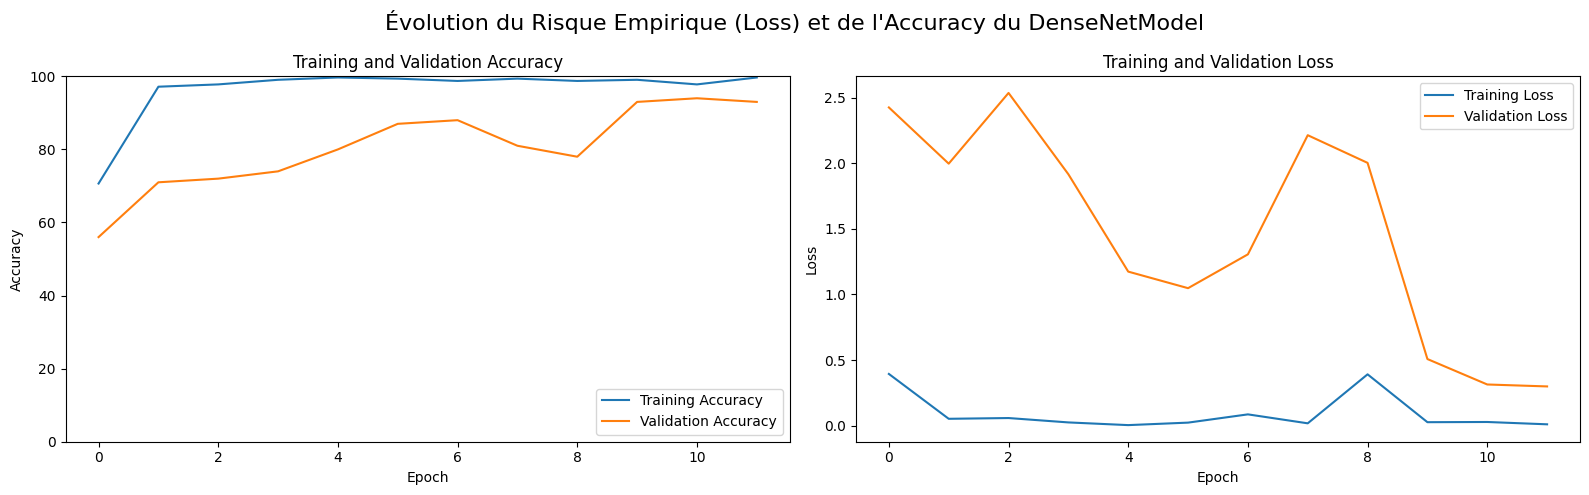

In [89]:
# Graphes Training and Validation (Accuracy and Loss)
trainer_dense.plots(train_losses, val_losses, train_accuracies, val_accuracies, model_name="DenseNetModel")

Le modèle DenseNet pré-entraîné a commencé avec une précision initiale de 70.66% et a rapidement atteint une précision proche de 100% sur l'ensemble d'entraînement dès l'époque 5, ce qui indique un fort apprentissage et une convergence rapide. La précision de validation a également montré des progrès constants, passant de 56% à 94% avec une perte de validation qui a diminué de 2.4252 à 0.2993. Cependant, des signes de surapprentissage ont émergé, comme en témoignent les variations et les augmentations de la perte de validation dans certaines époques. L'arrêt précoce a été activé à l'époque 12 pour prévenir le surapprentissage. Le temps total d'exécution, à 502.63 secondes, reflète la complexité du modèle.

### 3.6 Modèle Pré-entraîné (EfficientNet_v2)

In [129]:
from torchvision import models

# Charger le modèle pré-entraîné EfficientNetV2
class EfficientNet_V2_Small(nn.Module):
    def __init__(self):
        super(EfficientNet_V2_Small, self).__init__()
        self.base_model = models.efficientnet_v2_s(weights=models.EfficientNet_V2_S_Weights.IMAGENET1K_V1)
        # Adapter la dernière couche pour la classification binaire
        self.base_model.classifier[1] = nn.Linear(self.base_model.classifier[1].in_features, 2)

    def forward(self, x):
        return self.base_model(x)

In [130]:
# Paramètres entrainement_validation
model = EfficientNet_V2_Small()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)
criterion = nn.CrossEntropyLoss()

trainer_effnet = train_valid_model(model=model, train_loader=train_loader, val_loader=val_loader, optimizer=optimizer, 
    criterion=criterion, scheduler=scheduler)

# Appeler la fonction d'entraînement et de validation
train_losses, val_losses, train_accuracies, val_accuracies = trainer_effnet.train_and_valid(epochs=20, model_name="EfficientNet_v2")

Epoch 1/20 (EfficientNet_v2): 100%|██████████| 4/4 [00:37<00:00,  9.49s/it]


Epoch 1, Loss (EfficientNet_v2): 0.4789, Accuracy: 71.29%
Validation Loss: 0.6476, Validation Accuracy: 70.00%


Epoch 2/20 (EfficientNet_v2): 100%|██████████| 4/4 [00:45<00:00, 11.38s/it]


Epoch 2, Loss (EfficientNet_v2): 0.0736, Accuracy: 97.16%
Validation Loss: 0.3716, Validation Accuracy: 92.00%


Epoch 3/20 (EfficientNet_v2): 100%|██████████| 4/4 [00:42<00:00, 10.63s/it]


Epoch 3, Loss (EfficientNet_v2): 0.0250, Accuracy: 98.42%
Validation Loss: 0.4651, Validation Accuracy: 93.00%


Epoch 4/20 (EfficientNet_v2): 100%|██████████| 4/4 [00:43<00:00, 10.89s/it]


Epoch 4, Loss (EfficientNet_v2): 0.0068, Accuracy: 99.68%
Validation Loss: 0.3787, Validation Accuracy: 93.00%


Epoch 5/20 (EfficientNet_v2): 100%|██████████| 4/4 [00:41<00:00, 10.29s/it]


Epoch 5, Loss (EfficientNet_v2): 0.0005, Accuracy: 100.00%
Validation Loss: 0.2261, Validation Accuracy: 97.00%


Epoch 6/20 (EfficientNet_v2): 100%|██████████| 4/4 [00:43<00:00, 10.98s/it]


Epoch 6, Loss (EfficientNet_v2): 0.0163, Accuracy: 99.68%
Validation Loss: 0.1854, Validation Accuracy: 96.00%


Epoch 7/20 (EfficientNet_v2): 100%|██████████| 4/4 [00:42<00:00, 10.70s/it]


Epoch 7, Loss (EfficientNet_v2): 0.0359, Accuracy: 98.11%
Validation Loss: 0.2101, Validation Accuracy: 97.00%


Epoch 8/20 (EfficientNet_v2): 100%|██████████| 4/4 [00:39<00:00,  9.85s/it]


Epoch 8, Loss (EfficientNet_v2): 0.0380, Accuracy: 98.42%
Validation Loss: 0.3717, Validation Accuracy: 96.00%


Epoch 9/20 (EfficientNet_v2): 100%|██████████| 4/4 [00:42<00:00, 10.64s/it]


Epoch 9, Loss (EfficientNet_v2): 0.0167, Accuracy: 99.37%
Validation Loss: 0.4901, Validation Accuracy: 93.00%


Epoch 10/20 (EfficientNet_v2): 100%|██████████| 4/4 [00:38<00:00,  9.71s/it]


Epoch 10, Loss (EfficientNet_v2): 0.1113, Accuracy: 96.21%
Validation Loss: 0.3604, Validation Accuracy: 94.00%


Epoch 11/20 (EfficientNet_v2): 100%|██████████| 4/4 [00:43<00:00, 10.80s/it]


Epoch 11, Loss (EfficientNet_v2): 0.2801, Accuracy: 98.42%
Validation Loss: 0.2570, Validation Accuracy: 95.00%


Epoch 12/20 (EfficientNet_v2): 100%|██████████| 4/4 [00:45<00:00, 11.29s/it]


Epoch 12, Loss (EfficientNet_v2): 0.0213, Accuracy: 99.68%
Validation Loss: 0.2348, Validation Accuracy: 95.00%


Epoch 13/20 (EfficientNet_v2): 100%|██████████| 4/4 [00:40<00:00, 10.09s/it]


Epoch 13, Loss (EfficientNet_v2): 0.0115, Accuracy: 99.68%
Validation Loss: 0.2452, Validation Accuracy: 95.00%
Arrêt précoce activé.
Temps d'exécution jusqu'à l'époque 13: 593.00 secondes


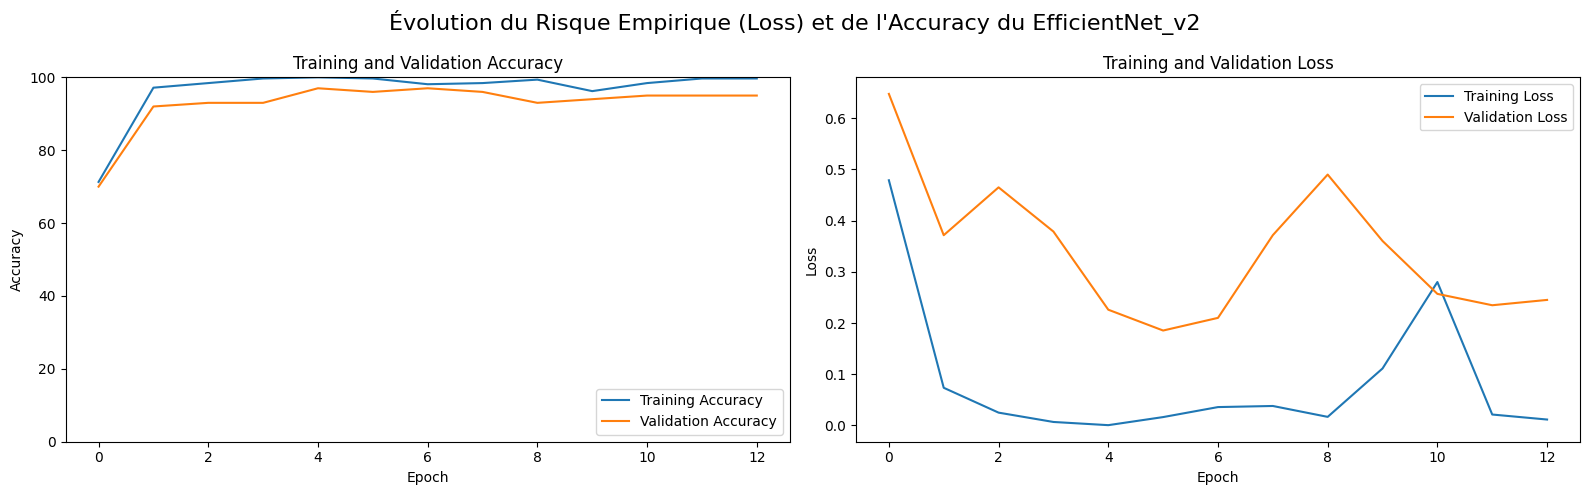

In [131]:
# Graphes Training and Validation (Accuracy and Loss)
trainer_effnet.plots(train_losses, val_losses, train_accuracies, val_accuracies, model_name="EfficientNet_v2")

Le modèle EfficientNetV2 a rapidement amélioré ses performances, atteignant une précision d'entraînement de 99.68% en 13 époques, avec une validation maximale de 97%. La perte de validation a initialement baissé à 0.1854 mais a commencé à fluctuer, signalant un possible surapprentissage dès l'époque 9. L'arrêt précoce à l'époque 13 a été activé pour maintenir la généralisation. L'entraînement a duré 593 secondes, montrant ainsi la complexité du modèle.

# 4 Entrainements_tests sur les modèles sélectionnés (Grande Base Données)

Pour la prédiction sur la grande base de données, nous avons retenu les modèles CNN et MobileNetV2 en raison de leurs précisions légèrement supérieures par rapport aux autres modèles. De plus, l'inclusion de MobileNetV2, un modèle pré-entraîné, s'est avérée pertinente pour sa capacité à capitaliser sur l'apprentissage préalable, tandis que le modèle CNN offre une architecture construite spécifiquement pour cette tâche.

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Paramètres
nb_classes = 2
batch_size = 100
img_width = 128
img_height = 128

data_dir = '/content/drive/My Drive/UB Courses/Data_Projet_1_Defi_IA'

# Définir les transformations pour normaliser les images
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((img_width, img_height)),  # Redimensionner les images
        transforms.ToTensor(),  # Convertir les images en tenseur PyTorch
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normaliser les images
    ]),
    'val': transforms.Compose([
        transforms.Resize((img_width, img_height)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Charger les ensembles d'entraînement et de validation
train_dataset = datasets.ImageFolder(data_dir + '/train', transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(data_dir + '/validation', transform=data_transforms['val'])

# Créer les DataLoaders pour charger les images par lots
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Obtenir les classes
class_names = train_dataset.classes
print(f"Classes: {class_names}")

Classes: ['other', 'target']


### 4.1 Réseaux de neurones convolutifs 1

In [91]:
# Paramètres entrainement_validation
model = CNN()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)
criterion = nn.CrossEntropyLoss()

trainer_cnn = train_valid_model(model=model, train_loader=train_loader, val_loader=val_loader, optimizer=optimizer, 
    criterion=criterion, scheduler=scheduler)

# Appeler la fonction d'entraînement et de validation
train_losses, val_losses, train_accuracies, val_accuracies = trainer_cnn.train_and_valid(epochs=20, model_name="CNN")

Epoch 1/20 (CNN): 100%|██████████| 583/583 [12:46<00:00,  1.31s/it]


Epoch 1, Loss (CNN): 0.3277, Accuracy: 88.16%
Validation Loss: 0.2412, Validation Accuracy: 90.74%


Epoch 2/20 (CNN): 100%|██████████| 583/583 [11:41<00:00,  1.20s/it]


Epoch 2, Loss (CNN): 0.2221, Accuracy: 91.60%
Validation Loss: 0.2015, Validation Accuracy: 92.24%


Epoch 3/20 (CNN): 100%|██████████| 583/583 [11:17<00:00,  1.16s/it]


Epoch 3, Loss (CNN): 0.2051, Accuracy: 92.08%
Validation Loss: 0.1941, Validation Accuracy: 92.00%


Epoch 4/20 (CNN): 100%|██████████| 583/583 [09:49<00:00,  1.01s/it]


Epoch 4, Loss (CNN): 0.1935, Accuracy: 92.61%
Validation Loss: 0.1888, Validation Accuracy: 92.44%


Epoch 5/20 (CNN): 100%|██████████| 583/583 [09:59<00:00,  1.03s/it]


Epoch 5, Loss (CNN): 0.1856, Accuracy: 92.79%
Validation Loss: 0.1882, Validation Accuracy: 92.54%


Epoch 6/20 (CNN): 100%|██████████| 583/583 [16:22<00:00,  1.69s/it]


Epoch 6, Loss (CNN): 0.1803, Accuracy: 93.04%
Validation Loss: 0.1832, Validation Accuracy: 92.76%


Epoch 7/20 (CNN): 100%|██████████| 583/583 [16:11<00:00,  1.67s/it]


Epoch 7, Loss (CNN): 0.1773, Accuracy: 93.17%
Validation Loss: 0.2290, Validation Accuracy: 90.14%


Epoch 8/20 (CNN): 100%|██████████| 583/583 [20:08<00:00,  2.07s/it]


Epoch 8, Loss (CNN): 0.1690, Accuracy: 93.41%
Validation Loss: 0.1921, Validation Accuracy: 92.76%


Epoch 9/20 (CNN): 100%|██████████| 583/583 [12:56<00:00,  1.33s/it]


Epoch 9, Loss (CNN): 0.1634, Accuracy: 93.60%
Validation Loss: 0.1862, Validation Accuracy: 92.66%


Epoch 10/20 (CNN): 100%|██████████| 583/583 [10:30<00:00,  1.08s/it]


Epoch 10, Loss (CNN): 0.1592, Accuracy: 93.86%
Validation Loss: 0.2124, Validation Accuracy: 91.68%


Epoch 11/20 (CNN): 100%|██████████| 583/583 [10:33<00:00,  1.09s/it]


Epoch 11, Loss (CNN): 0.1388, Accuracy: 94.55%
Validation Loss: 0.1498, Validation Accuracy: 94.22%


Epoch 12/20 (CNN): 100%|██████████| 583/583 [11:29<00:00,  1.18s/it]


Epoch 12, Loss (CNN): 0.1342, Accuracy: 94.74%
Validation Loss: 0.1460, Validation Accuracy: 94.20%
Arrêt précoce activé.
Temps d'exécution jusqu'à l'époque 12: 9601.68 secondes


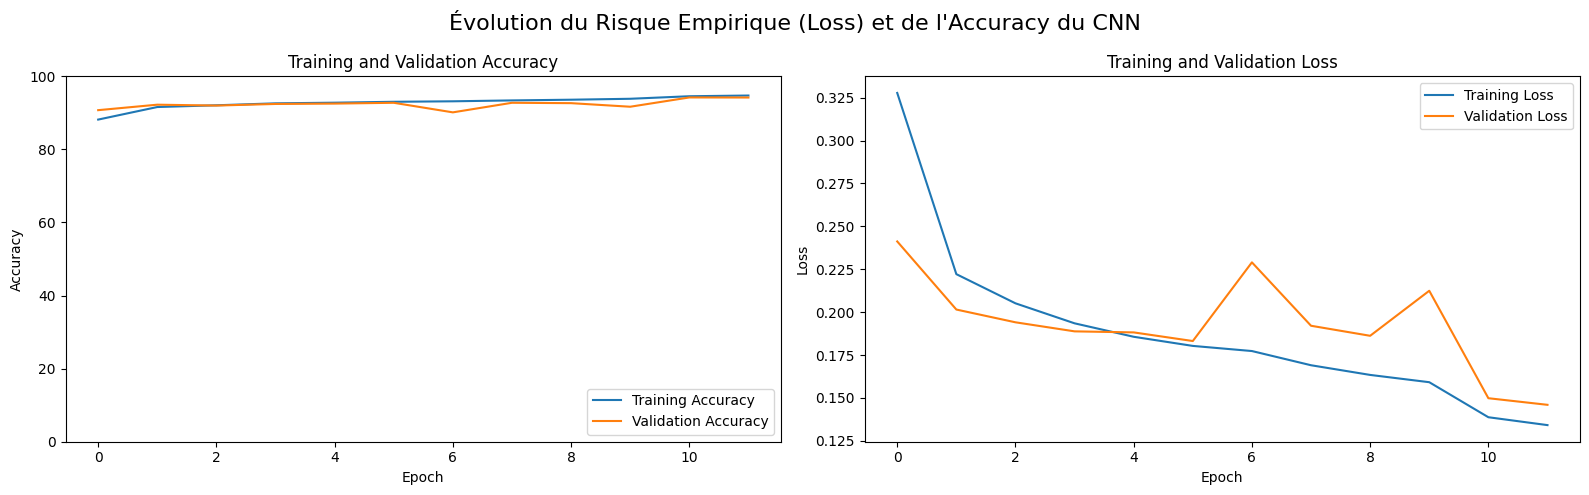

In [92]:
# Graphes Training and Validation (Accuracy and Loss)
trainer_cnn.plots(train_losses, val_losses, train_accuracies, val_accuracies, model_name="CNN")

### 4.2 Modèle Pré-entraîné (MobileNet_V2)

In [8]:
# Paramètres entrainement_validation
model = MobileNet_V2()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)
criterion = nn.CrossEntropyLoss()

trainer_mn = train_valid_model(model=model, train_loader=train_loader, val_loader=val_loader, optimizer=optimizer, 
    criterion=criterion, scheduler=scheduler)

# Appeler la fonction d'entraînement et de validation
train_losses, val_losses, train_accuracies, val_accuracies = trainer_mn.train_and_valid(epochs=20, model_name="MobileNetv2")

Epoch 1/20 (MobileNetv2): 100%|██████████| 583/583 [43:11<00:00,  4.44s/it]


Epoch 1, Loss (MobileNetv2): 0.0867, Accuracy: 96.99%
Validation Loss: 0.0702, Validation Accuracy: 97.50%


Epoch 2/20 (MobileNetv2): 100%|██████████| 583/583 [40:44<00:00,  4.19s/it]


Epoch 2, Loss (MobileNetv2): 0.0675, Accuracy: 97.75%
Validation Loss: 0.0806, Validation Accuracy: 97.06%


Epoch 3/20 (MobileNetv2): 100%|██████████| 583/583 [41:20<00:00,  4.25s/it]


Epoch 3, Loss (MobileNetv2): 0.0611, Accuracy: 97.90%
Validation Loss: 0.0755, Validation Accuracy: 97.42%


Epoch 4/20 (MobileNetv2): 100%|██████████| 583/583 [50:25<00:00,  5.19s/it]


Epoch 4, Loss (MobileNetv2): 0.0524, Accuracy: 98.13%
Validation Loss: 0.0771, Validation Accuracy: 97.44%


Epoch 5/20 (MobileNetv2): 100%|██████████| 583/583 [44:58<00:00,  4.63s/it]


Epoch 5, Loss (MobileNetv2): 0.0340, Accuracy: 98.84%
Validation Loss: 0.0666, Validation Accuracy: 97.96%


Epoch 6/20 (MobileNetv2): 100%|██████████| 583/583 [45:37<00:00,  4.70s/it]


Epoch 6, Loss (MobileNetv2): 0.0223, Accuracy: 99.23%
Validation Loss: 0.0757, Validation Accuracy: 97.90%


Epoch 7/20 (MobileNetv2): 100%|██████████| 583/583 [52:52<00:00,  5.44s/it]


Epoch 7, Loss (MobileNetv2): 0.0148, Accuracy: 99.54%
Validation Loss: 0.0884, Validation Accuracy: 97.70%


Epoch 8/20 (MobileNetv2): 100%|██████████| 583/583 [46:24<00:00,  4.78s/it]


Epoch 8, Loss (MobileNetv2): 0.0095, Accuracy: 99.71%
Validation Loss: 0.1097, Validation Accuracy: 97.64%


Epoch 9/20 (MobileNetv2): 100%|██████████| 583/583 [46:41<00:00,  4.80s/it]


Epoch 9, Loss (MobileNetv2): 0.0050, Accuracy: 99.88%
Validation Loss: 0.1118, Validation Accuracy: 97.62%


Epoch 10/20 (MobileNetv2): 100%|██████████| 583/583 [50:21<00:00,  5.18s/it]


Epoch 10, Loss (MobileNetv2): 0.0041, Accuracy: 99.91%
Validation Loss: 0.1187, Validation Accuracy: 97.68%


Epoch 11/20 (MobileNetv2): 100%|██████████| 583/583 [51:44<00:00,  5.33s/it]


Epoch 11, Loss (MobileNetv2): 0.0035, Accuracy: 99.92%
Validation Loss: 0.1232, Validation Accuracy: 97.58%


Epoch 12/20 (MobileNetv2): 100%|██████████| 583/583 [50:43<00:00,  5.22s/it]


Epoch 12, Loss (MobileNetv2): 0.0031, Accuracy: 99.94%
Validation Loss: 0.1304, Validation Accuracy: 97.58%
Arrêt précoce activé.
Temps d'exécution jusqu'à l'époque 12: 34576.06 secondes


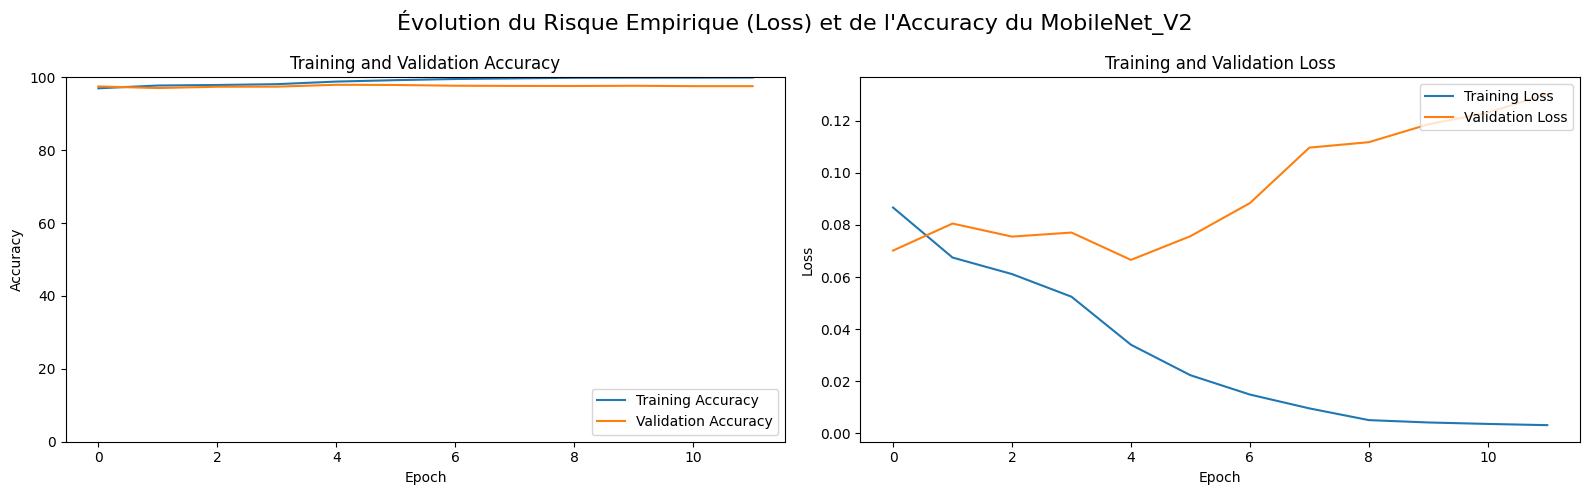

In [12]:
# Graphes Training and Validation (Accuracy and Loss)
trainer_mn.plots(train_losses, val_losses, train_accuracies, val_accuracies, model_name="MobileNet_V2")

### 4.3-Images validations prédictes avec le meilleur modèle

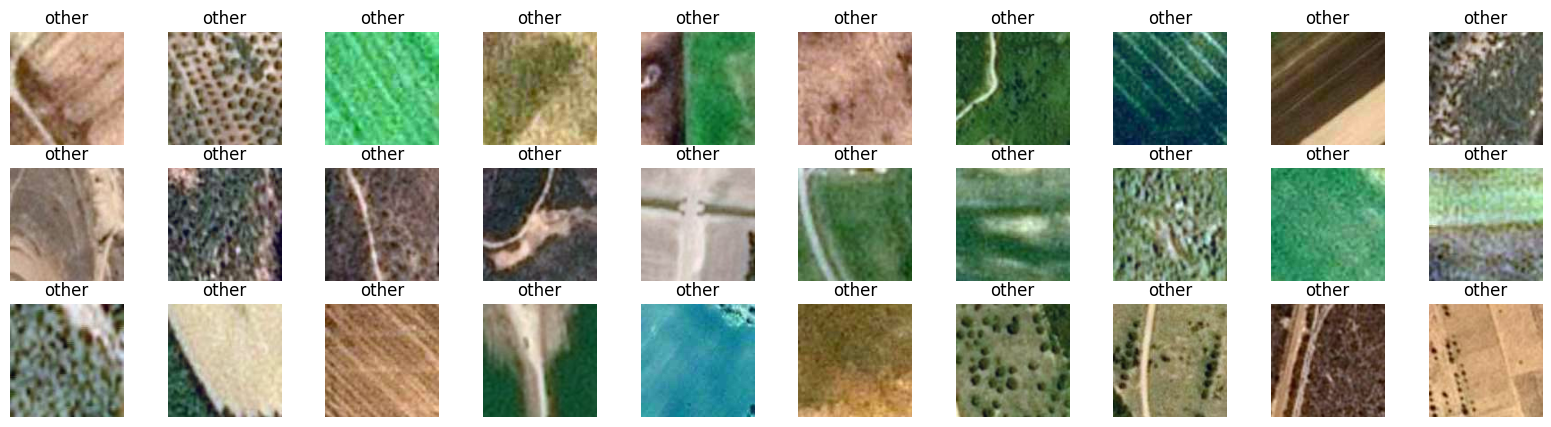

In [18]:
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prédictions sur un batch d'images de validation
val_batches = list(val_loader)
# len(val_batches)

model.eval()  
with torch.no_grad(): 
    inputs, labels = random.choice(val_batches)
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)

# Afficher les images et leurs prédictions
plt.figure(figsize=(20, 5))
for i in range(30): 
    ax = plt.subplot(3, 10, i + 1)
    image = inputs[i].cpu().permute(1, 2, 0).numpy()
    image = (image - image.min()) / (image.max() - image.min())
    plt.imshow(image)  # Afficher l'image
    plt.title(class_names[predictions[i]])
    plt.axis("off")
plt.show()

In [171]:
# Obtenir la correspondance des classes avec leurs indices
label_map = train_dataset.class_to_idx
print(label_map)

{'other': 0, 'target': 1}


### 4.4 Images tests prédictes avec le meilleur modèle

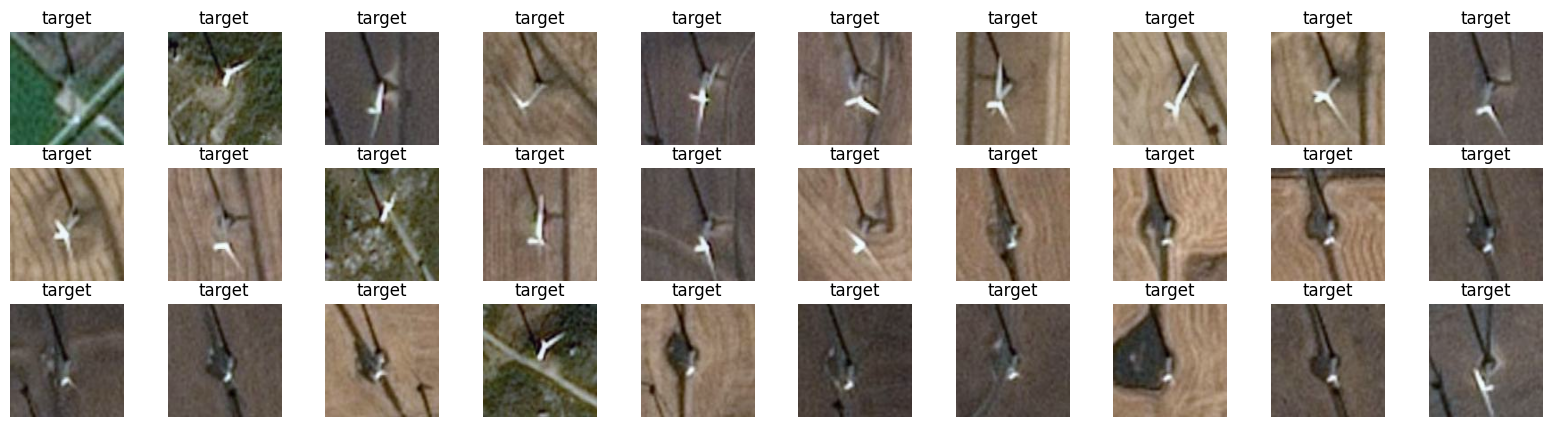

In [17]:
import os

# Définir la transformation pour les images de test
data_transforms['test'] = transforms.Compose([
    transforms.Resize((img_width, img_height)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Charger les images de test
prediction_dir = data_dir + "/test/"
test_dataset = datasets.ImageFolder(prediction_dir, transform=data_transforms['test'])
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

# Prédictions sur un batch d'images de validation
test_batches = list(test_loader)

model.eval()
with torch.no_grad():
    inputs, labels = random.choice(test_batches)
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
        
# Afficher les images et leurs prédictions
plt.figure(figsize=(20, 5))
for i in range(30):
    ax = plt.subplot(3, 10, i + 1)
    image = inputs[i].cpu().permute(1, 2, 0).numpy()
    image = (image - image.min()) / (image.max() - image.min())
    plt.imshow(image)  # Afficher l'image
    plt.title(class_names[predictions[i]])
    plt.axis("off")
plt.show()

### 4-5 Enregistrement du fichier de prédictions

In [19]:
# Définir la transformation pour les images de test
data_transforms['test'] = transforms.Compose([
    transforms.Resize((img_width, img_height)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Charger les images de test
prediction_dir = data_dir + "/test/"
test_dataset = datasets.ImageFolder(prediction_dir, transform=data_transforms['test'])
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Mettre le modèle en mode évaluation
model.eval()

# Liste pour stocker les prédictions
predictions = []
img_names = []

# Faire des prédictions sur les images de test
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted.item())

### LES LIGNES SUIVANTES SONT À NE PAS TOUCHER!
### Elles servent à creer un fichier que vous devez fournir dans le rendu.
### Ce fichier garde les prediccions dans un format qui nous permet de verifier par rapport aux vraies étiquettes .

# Extraire les noms des fichiers d'images depuis test_dataset.samples
file_paths = [sample[0] for sample in test_dataset.samples]
img_names = [os.path.basename(path) for path in file_paths]  # Obtenir juste le nom du fichier image

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({'name': img_names, 'prediction': predictions})

# Sauvegarder le fichier dans le format souhaité : name;prediction
results_df.to_csv('predictions.csv', index=False, sep=';')

In [16]:
print(results_df)

          name  prediction
0        1.jpg           1
1       10.jpg           1
2      100.jpg           1
3     1000.jpg           1
4     1001.jpg           1
...        ...         ...
4988   995.jpg           0
4989   996.jpg           0
4990   997.jpg           0
4991   998.jpg           1
4992   999.jpg           1

[4993 rows x 2 columns]
